# A Python short course on Atmospheric Data Analysis - Week 3

This Python tutorial was written in June 2024 by Ludving Cano, Research Assistant at the [Laboratory for Atmospheric Physics](http://www.chacaltaya.edu.bo) - UMSA (lcano@chacaltaya.edu.bo). It shows how to handle time data and do basic plots on it.

On **week 3** we will cover:

 - Datetime objects
   - Formatting datetimes
 - Pandas functions for datetime
 - Simple time plots
 - Plotting multiple things together

## 1. The `datetime` library
Let's start with a library that's gonna be useful in general, the [datetime library](https://docs.python.org/3/library/datetime.html) consists on general functions and objects dedicated to handle...time?

For example, when we declare a date, we have to put it in a string, so for the computer is a string like the others, it can't interpret its year, day, month, etc. 

In [1]:
day0s = '2024/06/28'

type(day0s) #its type is just an ordinary string

str

If we want, for example, to add one day to this string, it's PAINFULLY hard, and it can bring some problems!

Our saviour for today, the datetime library. Let's import it

In [2]:
import datetime as dt     #it's very common to import it with the dt alias

### 1.1. Creating a dt.datetime object
We have three objects to work on:
 1. `date` consisting only on information of the date (not knowing the exact time)
 2. `time` consisting only on the time (not knowing the date)
 3. `datetime` consisting on both, date and time information.
 
We'll work mainly on the last one, but feel free to explore the other two using the [documentation](https://docs.python.org/3/library/datetime.html).

Okay, let's create a datetime object, it's important that this is different from the library's name (datetime too), so to create the object we use `dt.datetime`.

First let's take a look on what to add to create a datetime object, for this:

In [3]:
help(dt.datetime) #uncomment it to use

Help on class datetime in module datetime:

class datetime(date)
 |  datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])
 |  
 |  The year, month and day arguments are required. tzinfo may be None, or an
 |  instance of a tzinfo subclass. The remaining arguments may be ints.
 |  
 |  Method resolution order:
 |      datetime
 |      date
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __le__(self, value, /)
 |      Return self<=value.
 |  
 |  __lt__(self, value, /)
 |      Return self<value.
 |  
 |  __ne__(self, value, /)
 |      Return self!=value.
 |  
 |  __radd__(self, value

The basic way to know what to add to create the object is passing the year, month, day, hour, minutes and seconds. Time information is optional, it'll assume it's 00:00.

For the sake of the example we will set the date and time for the start of this class.

In [5]:
day0 = dt.datetime(year = 2024, month = 6, day = 28, hour = 13, minute = 30)
day0

datetime.datetime(2024, 6, 28, 13, 30)

In [6]:
day0 = dt.datetime(2024, 6, 27, 13, 30)
day0

datetime.datetime(2024, 6, 27, 13, 30)

If we want to create a datetime object with the current date and time, we use:

In [8]:
dt.datetime.now()

datetime.datetime(2024, 6, 28, 13, 56, 23, 386888)

### 1.2. Getting information from an existent datetime object

We can get any information by simply calling the attributes:

In [14]:
day0.year
# try to change it for: year, month, day, minute, second, etc.

2024

But also we can get a `time` and a `date` object.

In [15]:
day0.date()

datetime.date(2024, 6, 27)

In [16]:
day0.time()

datetime.time(13, 30)

In [20]:
dt.datetime.now().time()

datetime.time(13, 59, 51, 156583)

### 1.3. Operations using datetime objects

#### 1.3.1. Adding or substracting time

What if we want to change the time to the end of the next class? Then we add time! (That's beautiful, it accounts even for leap years).

For this we simply add an object called `dt.timedelta()` in which we put the change desired.

In [23]:
dayf = day0 - dt.timedelta(days = 7, hours = 3)
dayf

datetime.datetime(2024, 6, 20, 10, 30)

If you want to go back in time, you can substract the object timedelta OR pass negative arguments to `dt.timedelta()`.

#### 1.3.1. Replacing parts of the object

Oh no! I put the wrong month, what if we want to replace the month? We'll use `dt.replace()`.

In [24]:
daymod = day0.replace(month = 8)
daymod

datetime.datetime(2024, 8, 27, 13, 30)

#### 1.3.2. Substracting datetime objects

What if we want to know how many days have passed since something? For example, since Christmas? We can substract datetime objects and get a timedelta as result.

In [25]:
last_xmas = dt.datetime(2023, 12, 25)
today = dt.datetime.now()

dif = today - last_xmas
dif

datetime.timedelta(days=186, seconds=50637, microseconds=621351)

Take into account that the resulting timedelta only have the attributes `days`, `seconds` and `microseconds`. 

<b><font color="green" size=5>Exercise 1: Your real age</font></b>

Create necessary datetimes and answer the following questions
1. How long has passed since your last birthday?
2. Calculate in how much will pass for your next bday


#### 1.3.3. Comparing dates

Just for info, we can compare two datetime objects and get to know if one happened before or after the other one. Using < and >:

In [27]:
day0 < dayf

False

#### 1.3.4. Sorting a list of datetimes
When we can apply operators < or > to objects, we can sort a list that is made of them, for example I can compile some of the datetime objects we created before into a list and show it.


In [28]:
lst_datetimes = [daymod, day0, dayf, today]
lst_datetimes

[datetime.datetime(2024, 8, 27, 13, 30),
 datetime.datetime(2024, 6, 27, 13, 30),
 datetime.datetime(2024, 6, 20, 10, 30),
 datetime.datetime(2024, 6, 28, 14, 3, 57, 621351)]

To sort it, we just do:


In [31]:
sorted(lst_datetimes)[::-1]

[datetime.datetime(2024, 8, 27, 13, 30),
 datetime.datetime(2024, 6, 28, 14, 3, 57, 621351),
 datetime.datetime(2024, 6, 27, 13, 30),
 datetime.datetime(2024, 6, 20, 10, 30)]

## 1.4. Formatting datetimes
### 1.4.1. String to datetime
Remember our first example? `day0s`

In [32]:
day0s

'2024/06/28'

How can we convert that string to a datetime? For this the library has the `strptime()` function, which takes an arbitrary string and a format, with that the function parses the string and returns the desired object.

For example, our day0s string has the format year/month/day. According to the [datetime formats in documentation](https://docs.python.org/3/library/datetime.html#format-codes) the format can be written as `%Y/%m/%d`. So we add this to the function:

In [41]:
day0f = dt.datetime.strptime('2025/11/29', '%Y/%m/%d')
day0f

datetime.datetime(2025, 11, 29, 0, 0)

<b><font color="green" size=4]>Exercise 2: Format a date</font></b>

Convert the following string to a datetime object.

In [ ]:
test_str = '10-13-2024 10:00'

### 1.4.2. Datetime to string
Well, sometimes we want to print a datetime with a certain format, it may be for writing in a simple way in a file, display it on screen or any other use.

For this we pass a datetime object and the desired output format into the `dt.datetime.strftime()` function.
For example I can print the `.now()` datetime in the format of the exercise 2:

In [46]:
dt.datetime.strftime(dt.datetime.now(), '%B%d, %a at %H:%M')

'June28, Fri at 14:30'

## 2. Pandas functions for datetime

### 2.1. Columns of datetime

On the last session we observed that pandas doesn't infer automatically all the data, so, for example we can see that a column that clearly has dates is interpreted as object.

We will use the IUV file from the last week: `data_samples/IUV_18_06.csv`

In [47]:
# let's not forget to import pandas!
import pandas as pd

In [52]:
df1 = pd.read_csv('data_samples/IUV_18_06.csv')
df1.dtypes

TIME     object
IUV     float64
dtype: object

In [53]:
type(df1.TIME[0])

str

To convert the TIME column to a datetime-like column, we use the `pd.to_datetime()` function, and passing the desired column as parameter. **NOTE: It will do its best to infer which format we are using, but sometimes you can pass the exact format just in case.**

In [54]:
pd.to_datetime(df1.TIME)

0     2024-06-18 06:00:00
1     2024-06-18 06:01:00
2     2024-06-18 06:02:00
3     2024-06-18 06:03:00
4     2024-06-18 06:04:00
              ...        
712   2024-06-18 17:55:00
713   2024-06-18 17:56:00
714   2024-06-18 17:57:00
715   2024-06-18 17:58:00
716   2024-06-18 17:59:00
Name: TIME, Length: 717, dtype: datetime64[ns]

To replace the column in our original dataframe, we can replace it as we did before:


In [55]:
df1.columns = ['TIME0', 'IUV']

In [56]:
df1['TIME'] = pd.to_datetime(df1.TIME0)
df1.dtypes

TIME0            object
IUV             float64
TIME     datetime64[ns]
dtype: object

### 2.2. Some functions of a datetimelike column
Sometimes we would need to get something related to a datetime object, like getting the hour, as we are having a series, we would need to get the value for each row, this can be done (manually) like:

In [57]:
### NOT RECOMMENDED
pd.Series([i.hour for i in df1.TIME])

0       6
1       6
2       6
3       6
4       6
       ..
712    17
713    17
714    17
715    17
716    17
Length: 717, dtype: int64

But it can be easier using the `Series.dt` functions, that allow us to get data for the column itself.

In [58]:
## this is the recommended way!
df1.TIME.dt.hour

0       6
1       6
2       6
3       6
4       6
       ..
712    17
713    17
714    17
715    17
716    17
Name: TIME, Length: 717, dtype: int64

### 2.3. An example for different columns
Let's use for example the DECADE file we worked last week, it has a column for year, month and day, so to get a column datetime we will do the following:

In [61]:
## This example will be worked with the instructor, solutions below

fname = 'data_samples/EL_ALTO_AEROPUERTO_simple.dat'

df2 = pd.read_csv(fname, skiprows = 12, delim_whitespace = True)
df2 = df2[['Year', 'Mo', 'Da', 'Param=1']]
df2.columns = ['year', 'month', 'day', 'prcp']
df2

,year,month,day,prcp
0,1979,1,1,4.2
1,1979,1,2,2.2
2,1979,1,3,2.1
3,1979,1,4,7.6
4,1979,1,5,13.6
...,...,...,...,...
13509,2015,12,27,1.8
13510,2015,12,28,0.0
13511,2015,12,29,5.2
13512,2015,12,30,0.0


In [64]:
df2['datetime'] = pd.to_datetime(df2[['year', 'month', 'day']])
df2

,year,month,day,prcp,datetime
0,1979,1,1,4.2,1979-01-01
1,1979,1,2,2.2,1979-01-02
2,1979,1,3,2.1,1979-01-03
3,1979,1,4,7.6,1979-01-04
4,1979,1,5,13.6,1979-01-05
...,...,...,...,...,...
13509,2015,12,27,1.8,2015-12-27
13510,2015,12,28,0.0,2015-12-28
13511,2015,12,29,5.2,2015-12-29
13512,2015,12,30,0.0,2015-12-30


In [67]:
df3 = df2[df2.year == 1999]
df3

,year,month,day,prcp,datetime
7305,1999,1,1,8.7,1999-01-01
7306,1999,1,2,2.5,1999-01-02
7307,1999,1,3,9.1,1999-01-03
7308,1999,1,4,0.0,1999-01-04
7309,1999,1,5,1.4,1999-01-05
...,...,...,...,...,...
7665,1999,12,27,0.0,1999-12-27
7666,1999,12,28,4.8,1999-12-28
7667,1999,12,29,24.8,1999-12-29
7668,1999,12,30,4.7,1999-12-30


<details><summary><b><font color="black">If the instructor is not available click here</font></b></summary>

```
df_dec = pd.read_csv('data_samples/EL_ALTO_AEROPUERTO_simple.dat',
                delim_whitespace=True, skiprows = 12)
df_dec = df_dec[['Year','Mo','Da','Param=1']]
df_dec.columns = ['Year','Month', 'Day', 'PRCP']
df_dec['datetime'] = pd.to_datetime(df_dec[['Year','Month','Day']])
```


## (Little parenthesis): Reading a Davis AWS file
The Davis Automatic Weather Station was located at an experimental site last year, this file is a bit complicated, as the header consist of two rows of headers!

The file is located at `data_samples/FabricaForno_Davis_WS.txt`.

In [70]:
davis = pd.read_csv('data_samples/FabricaForno_Davis_WS.txt', 
                    skiprows=2, sep = '\t', header = None)

#recreating the header
hd1, hd2 = [i.split('\t') for i in open('data_samples/FabricaForno_Davis_WS.txt').readlines()[:2]]
hdd = [(i+' '+j).strip() for i, j in zip(hd1, hd2)]

davis.columns = hdd
davis

,Date,Time,Temp Out,Hi Temp,Low Temp,Out Hum,Dew Pt.,Wind Speed,Wind Dir,Wind Run,...,In Temp,In Hum,In Dew,In Heat,In EMC,In Air Density,Wind Samp,Wind Tx,ISS Recept,Arc.\n Int.
0,25/07/23,0:05,4.4,4.6,4.4,15,-20.0,2.2,NW,0.67,...,19.9,20,-3.7,17.2,4.55,0.7880,90,4,85.7,5
1,25/07/23,0:10,4.3,4.4,4.3,15,-20.2,1.3,NW,0.40,...,19.9,20,-3.7,17.2,4.55,0.7881,56,4,53.3,5
2,25/07/23,0:15,4.2,4.3,4.2,16,-19.4,0.9,NW,0.27,...,19.9,20,-3.7,17.2,4.55,0.7881,101,4,96.2,5
3,25/07/23,0:20,4.2,4.2,4.2,16,-19.4,1.3,NW,0.40,...,19.9,20,-3.7,17.2,4.55,0.7882,99,4,94.3,5
4,25/07/23,0:25,4.3,4.3,4.2,15,-20.2,1.3,NNW,0.40,...,19.9,20,-3.7,17.2,4.55,0.7881,100,4,95.2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,27/07/23,12:50,10.8,10.8,10.3,28,-7.0,0.4,W,0.13,...,20.5,23,-1.4,18.1,5.13,0.7806,101,4,96.2,5
730,27/07/23,12:55,10.6,10.8,10.6,29,-6.7,1.8,W,0.54,...,20.5,23,-1.4,18.1,5.13,0.7804,104,4,99.0,5
731,27/07/23,13:00,10.4,10.6,10.4,30,-6.4,3.1,SW,0.94,...,20.5,22,-2.0,18.0,4.95,0.7806,103,4,98.1,5
732,27/07/23,13:05,10.8,10.8,10.5,28,-7.0,2.7,N,0.80,...,20.5,22,-2.0,18.0,4.95,0.7804,106,4,100.0,5


Now we want to create a datetime column using the first two columns Date and Time, to do this we will 

In [ ]:
davis['datetime'] = pd.to_datetime(davis.Date + ' ' + davis.Time)
davis.drop(['Date', 'Time'], axis = 1)

## 3. Plotting time series  
(If you are not following the class, go to the slides related to this week)

As said in the theory, we have different kinds of plots, each one can represent one, two, or more variables, some of them are useful for a certain thing.

For most of our plotting we will use the library `matplotlib`

In [81]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates #this is gonna be useful later
%matplotlib inline 
#solo cuando se usa notebook

### 3.1. Distributions (histograms)

Distributions are a way to see how a data (one variable) is distributed, that is, how many of its values lie in a certain range. Please do not think that are the same as barplots, that we can work if we have the time.

A distribution is best seen with a **histogram**, and to create a simple one we can call `plt` and pass our series, in this case the Ultraviolet Index Value (IUV) column of `df1`.

In [82]:
plt.hist(df1.IUV)

(array([302.,  36.,  35.,  37.,  33.,  33.,  39.,  45.,  57., 100.]),
 array([0.   , 0.763, 1.526, 2.289, 3.052, 3.815, 4.578, 5.341, 6.104,
        6.867, 7.63 ]),
 <BarContainer object of 10 artists>)

Note some things, in the x-axis we get our data distributed in 10 bars (called bins), in the y-axis we have the quantity of values that lie in that range.

For the sake of the experiment we can change the number of bins, also we can set our x and y labels using the following commands:

In [83]:
plt.hist(df1.IUV, bins = 20)
plt.xlabel('IUV')
plt.ylabel('Frequency')

Text(73.07738095238096, 0.5, 'Frequency')

Histograms can be complicated as one wants, you are invited to read its [official documentation.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

### 3.2. Plotting time series: Scatter vs Line Plot

So, here's the dilemma, when is it better to show a line that crosses the points? when do we only need the points? or when do we need only a line? 

The answer is... yes

It's hard since it depends, what do you want to show: A correlation between two axis? a scatter! But the fitted line? a line plot!

Let's put an example on the table, I'll show a scatter and a Line Plot for IUV.

Both of our options take two important parameters: x and y, they **have** to have the same lenght.

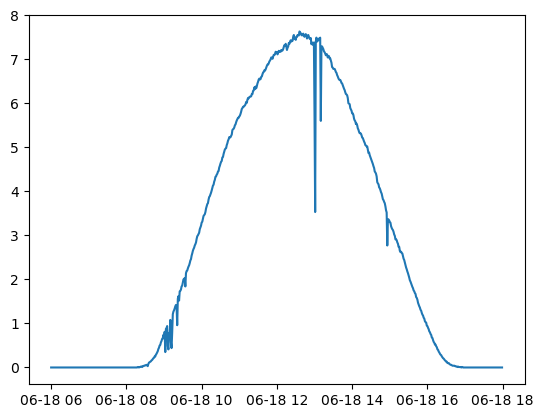

In [86]:
plt.plot(df1.TIME, df1.IUV)

Something is.. weird, to configure the way the date is showed we can use the following commands:

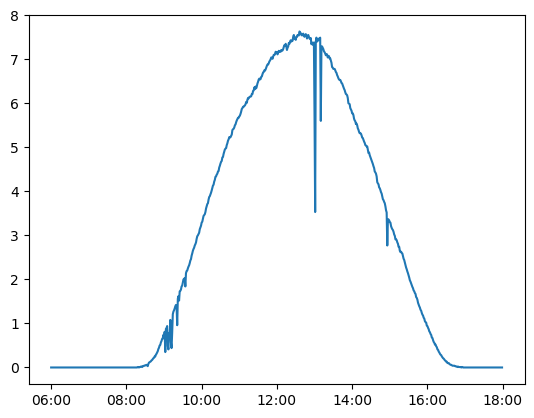

In [87]:
plt.plot(df1.TIME, df1.IUV)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

## Let's plot our precipitation data (df3)

In [102]:
df3 = df2[df2.year == 2002]
#df3.describe()

In [107]:
fecha1 = dt.datetime(1999,9,1)
fecha2 = dt.datetime(1999,9,30)

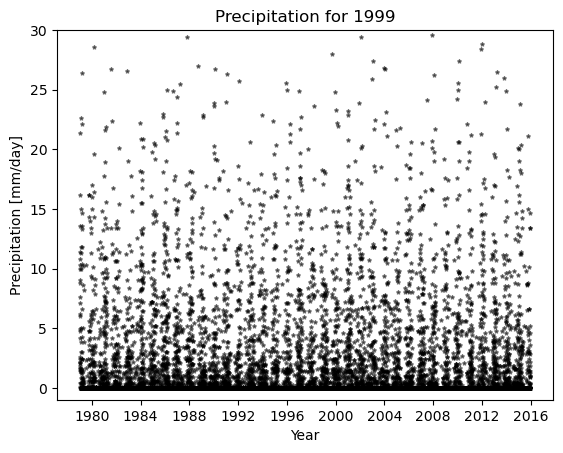

In [111]:
plt.scatter(df2.datetime, df2.prcp, s = 7, c = 'black',
           marker = '*', alpha = .5)
plt.xlabel('Year')
plt.ylim(-1,30)
plt.ylabel('Precipitation [mm/day]')
plt.title('Precipitation for 1999')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.savefig('plots/figura1.png', dpi = 400)

<b><font color="green" size=4]>Exercise 3: Plot the temperature (Temp Out) for Davis dataframe</font></b>

 1. Create a column of Datetime
 2. Create a plot for Temp Out
 3. Format Times as necessary

In [116]:
davis['datetime'] = pd.to_datetime(davis.Date + ' ' + davis.Time)
davis.datetime

0     2023-07-25 00:05:00
1     2023-07-25 00:10:00
2     2023-07-25 00:15:00
3     2023-07-25 00:20:00
4     2023-07-25 00:25:00
              ...        
729   2023-07-27 12:50:00
730   2023-07-27 12:55:00
731   2023-07-27 13:00:00
732   2023-07-27 13:05:00
733   2023-07-27 13:10:00
Name: datetime, Length: 734, dtype: datetime64[ns]

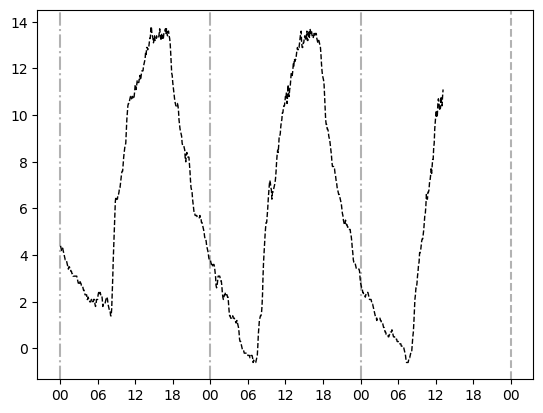

In [128]:
plt.plot(davis['datetime'],davis['Temp Out'], '--', lw = 1, c = 'k')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(byhour=(0,6,12,18)))
plt.axvline(dt.datetime(2023,7,25), ls = '-.', c = 'k', alpha = 0.3)
plt.axvline(dt.datetime(2023,7,26), ls = '-.', c = 'k', alpha = 0.3)
plt.axvline(dt.datetime(2023,7,27), ls = '-.', c = 'k', alpha = 0.3)
plt.axvline(dt.datetime(2023,7,28), ls = '--', c = 'k', alpha = 0.3)
